# Playground for Advanced Topics Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2020-07-09 08:05:31.916023


In [2]:
import pandas as pd
pd.show_versions(as_json=False)

import sklearn
sklearn.__version__


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.10.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.3
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.1.3.post20200325
Cython           : None
pytest           : 5.4.1
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.5.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.9.0
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.5.0


'0.21.3'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Generate Data

For educational purposes, we'll generate a synthetic dataset, rather than using a real one, at first. We'll create a dataset that has two features, both informative, with some overlap, but not much.

Later, we'll graduate to using real-world datasets with more features and less seperation between classes.

In [4]:
from sklearn.datasets import make_classification
import random

# After experiementation, this random state generates a "good looking" dataset
r = 4184

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, weights=[0.9, 0.1],
                           n_clusters_per_class=1, flip_y=0.09, class_sep = 1.1, random_state=r);

X1 = pd.DataFrame(X, columns=['Age', 'Income'])
y1 = pd.Series(y, name='Default')
df = pd.concat([X1, y1], axis=1)

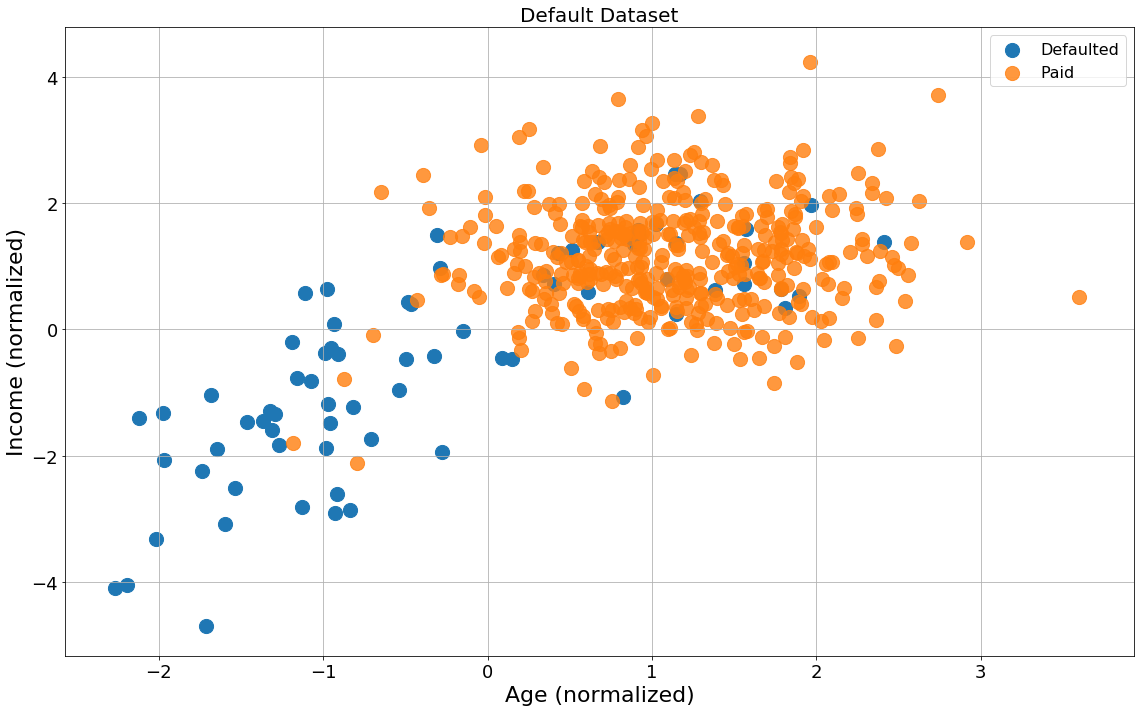

In [5]:
plt.figure(figsize=(16, 10));
plt.grid(True);

ind_d = y==1
ind_p = y==0
plt.scatter(X[ind_d,0], X[ind_d,1], marker='o', s=200, label='Defaulted');
plt.scatter(X[ind_p,0], X[ind_p,1], marker='o', s=200, label="Paid", alpha=0.8);

plt.legend(fontsize=16);
plt.title("Default Dataset", fontsize=20);
plt.xlabel('Age (normalized)', fontsize=22);
plt.ylabel('Income (normalized)', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
#plt.savefig('out/default-data.png');

In [6]:
X.shape
X[1:10,:]
y.shape
y[1:10]
df.head(15)

(500, 2)

array([[ 0.58597271,  2.35036464],
       [ 0.27982946,  0.83540131],
       [ 0.19585293,  1.24920912],
       [ 0.82281322,  1.24967923],
       [ 1.9198709 ,  2.8343012 ],
       [ 0.68073054, -0.22409896],
       [ 1.14567439,  0.24986299],
       [ 0.96821192,  0.57301515],
       [ 1.56205843, -0.04601173]])

(500,)

array([0, 0, 0, 0, 0, 0, 1, 0, 0])

,Age,Income,Default
0,0.748126,1.185890,0
1,0.585973,2.350365,0
2,0.279829,0.835401,0
3,0.195853,1.249209,0
4,0.822813,1.249679,0
5,1.919871,2.834301,0
6,0.680731,-0.224099,0
7,1.145674,0.249863,1
8,0.968212,0.573015,0
9,1.562058,-0.046012,0


In [7]:
df = pd.read_csv('data/GermanCredit.csv')

In [8]:
list(df)
df.shape
df.head()

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'Age',
 'NumberExistingCredits',
 'NumberPeopleMaintenance',
 'Telephone',
 'ForeignWorker',
 'Class',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.gt.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.PaidDuly',
 'CreditHistory.Delay',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Furniture.Equipment',
 'Purpose.Radio.Television',
 'Purpose.DomesticAppliance',
 'Purpose.Repairs',
 'Purpose.Education',
 'Purpose.Vacation',
 'Purpose.Retraining',
 'Purpose.Business',
 'Purpose.Other',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.100.to.500',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.1.to.4',
 'EmploymentDuration.4.to.7',
 'EmploymentDuration.gt.7',
 'Emp

(1000, 62)

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


# Feature Engineering

## Feature Scaling

In [9]:
from sklearn import preprocessing

X = df[['Amount']].copy()

scaler = preprocessing.StandardScaler().fit(X[['Amount']])
X['Amount_Scaled'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.MinMaxScaler().fit(X[['Amount']])
X['Amount_MinMax'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.PowerTransformer(method='box-cox').fit(X[['Amount']])
X['Amount_BoxCox'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(X[['Amount']])
X['Amount_YeoJohnson'] = scaler.transform(X[['Amount']])  

scaler = preprocessing.QuantileTransformer(random_state=0).fit(X[['Amount']])
X['Amount_Uniform'] = scaler.transform(X[['Amount']])  

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X[['Amount']])
X['Amount_Log'] = scaler.transform(X[['Amount']])  

type(X)
X.head()


pandas.core.frame.DataFrame

,Amount,Amount_Scaled,Amount_MinMax,Amount_BoxCox,Amount_YeoJohnson,Amount_Uniform,Amount_Log
0,1169,-0.745131,0.050567,-0.932601,-0.932701,0.154655,7.064759
1,5951,0.949817,0.313690,1.156740,1.156805,0.846847,8.691483
2,2096,-0.416562,0.101574,-0.157834,-0.157831,0.448448,7.648263
3,7882,1.634247,0.419941,1.496003,1.496009,0.927928,8.972464
4,4870,0.566664,0.254209,0.910973,0.911056,0.810811,8.491055


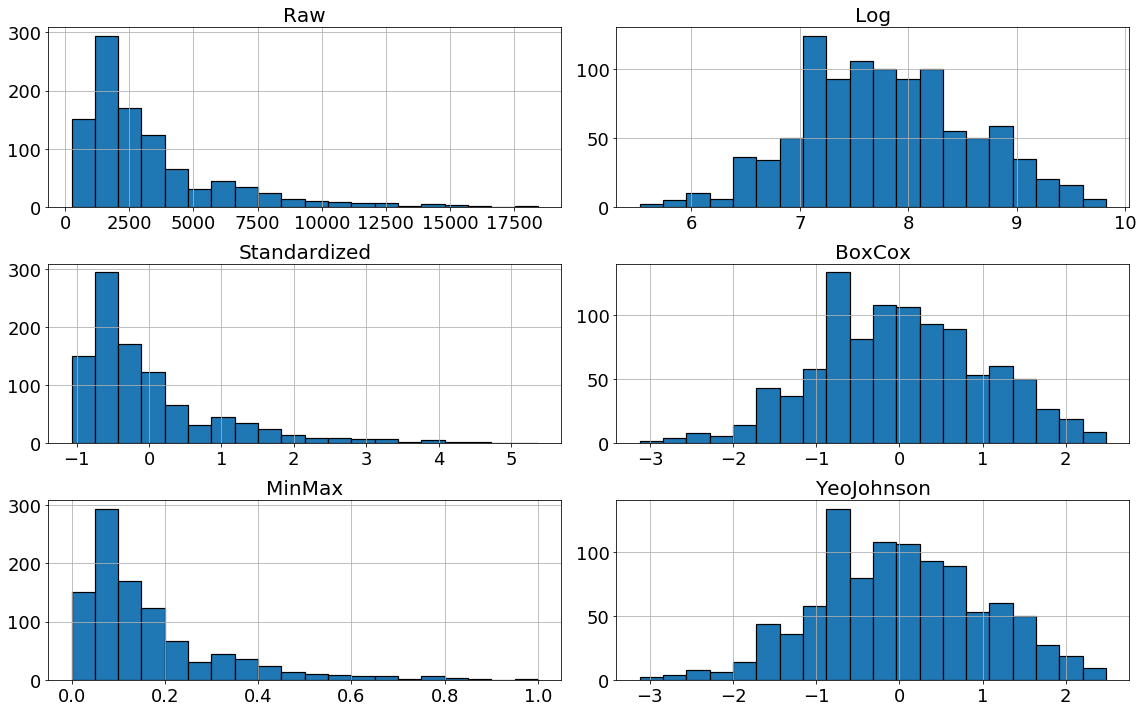

In [10]:
def plot_hist(ax, feature, title):
    ax.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    ax.set_title(title, fontsize=20);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);

plt.figure(figsize=(16, 10));
plt.grid(True);
plot_hist(plt.subplot(3, 2, 1), X['Amount'], 'Raw')
plot_hist(plt.subplot(3, 2, 2), X['Amount_Log'], 'Log')
plot_hist(plt.subplot(3, 2, 3), X['Amount_Scaled'], 'Standardized')
plot_hist(plt.subplot(3, 2, 4), X['Amount_BoxCox'], 'BoxCox')
plot_hist(plt.subplot(3, 2, 5), X['Amount_MinMax'], 'MinMax')
plot_hist(plt.subplot(3, 2, 6), X['Amount_YeoJohnson'], 'YeoJohnson')



#plt.title('Amount', fontsize=20)
plt.tight_layout();
plt.savefig('out/german_credit-transforms.png');

## Binning

In [ ]:
# TODO

# Categorical Features

## One Hot Encoding

In [ ]:
# TODO

## Contrasts

In [11]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[['Class']]
X = X.drop(['Class'], axis=1)

y['Class'] = y['Class'].map({'Good': 1, 'Bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(800, 61)

(200, 61)

# Aggregations

In [12]:
import featuretools as ft

In [13]:
es = ft.demo.load_mock_customer(return_entityset=True)
es

Entityset: transactions
  Entities:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [14]:
es["transactions"].df.head(30)

,transaction_id,session_id,transaction_time,amount,product_id
298,298,1,2014-01-01 00:00:00,127.64,5
2,2,1,2014-01-01 00:01:05,109.48,2
308,308,1,2014-01-01 00:02:10,95.06,3
116,116,1,2014-01-01 00:03:15,78.92,4
371,371,1,2014-01-01 00:04:20,31.54,3
486,486,1,2014-01-01 00:05:25,23.76,3
271,271,1,2014-01-01 00:06:30,43.63,3
192,192,1,2014-01-01 00:07:35,42.27,4
341,341,1,2014-01-01 00:08:40,47.68,3
10,10,1,2014-01-01 00:09:45,57.39,5


In [15]:
feature_matrix, features = ft.dfs(entityset=es,
                                   target_entity="customers",
                                   verbose=True)
feature_matrix

Built 73 features
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████████████████████| Calculated: 1/1 chunks


,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,NUM_UNIQUE(sessions.MODE(transactions.product_id)),NUM_UNIQUE(sessions.DAY(session_start)),NUM_UNIQUE(sessions.YEAR(session_start)),NUM_UNIQUE(sessions.MONTH(session_start)),NUM_UNIQUE(sessions.WEEKDAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.DAY(session_start)),MODE(sessions.YEAR(session_start)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start))
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,3,mobile,9025.62,40.442059,139.43,0.019698,5.81,71.631905,...,4,1,1,1,1,4,1,2014,1,2
2,13244,7,3,desktop,7200.28,37.705178,146.81,0.098259,8.73,77.422366,...,4,1,1,1,1,3,1,2014,1,2
3,13244,6,3,desktop,6236.62,43.683296,149.15,0.418230,5.89,67.060430,...,4,1,1,1,1,1,1,2014,1,2
4,60091,8,3,mobile,8727.68,45.068765,149.95,-0.036348,5.73,80.070459,...,5,1,1,1,1,1,1,2014,1,2
5,60091,6,3,mobile,6349.66,44.095630,149.02,-0.025941,7.55,80.375443,...,5,1,1,1,1,3,1,2014,1,2


In [16]:
list(feature_matrix)

['zip_code',
 'COUNT(sessions)',
 'NUM_UNIQUE(sessions.device)',
 'MODE(sessions.device)',
 'SUM(transactions.amount)',
 'STD(transactions.amount)',
 'MAX(transactions.amount)',
 'SKEW(transactions.amount)',
 'MIN(transactions.amount)',
 'MEAN(transactions.amount)',
 'COUNT(transactions)',
 'NUM_UNIQUE(transactions.product_id)',
 'MODE(transactions.product_id)',
 'DAY(join_date)',
 'DAY(date_of_birth)',
 'YEAR(join_date)',
 'YEAR(date_of_birth)',
 'MONTH(join_date)',
 'MONTH(date_of_birth)',
 'WEEKDAY(join_date)',
 'WEEKDAY(date_of_birth)',
 'SUM(sessions.STD(transactions.amount))',
 'SUM(sessions.MAX(transactions.amount))',
 'SUM(sessions.SKEW(transactions.amount))',
 'SUM(sessions.MIN(transactions.amount))',
 'SUM(sessions.MEAN(transactions.amount))',
 'SUM(sessions.NUM_UNIQUE(transactions.product_id))',
 'STD(sessions.SUM(transactions.amount))',
 'STD(sessions.MAX(transactions.amount))',
 'STD(sessions.SKEW(transactions.amount))',
 'STD(sessions.MIN(transactions.amount))',
 'STD(ses

In [17]:
ft.list_primitives() 

,name,type,description
0,num_unique,aggregation,Returns the number of unique categorical varia...
1,all,aggregation,Test if all values are 'True'.
2,sum,aggregation,Sums elements of a numeric or boolean feature.
3,max,aggregation,Finds the maximum non-null value of a numeric ...
4,skew,aggregation,Computes the skewness of a data set.
...,...,...,...
71,cum_min,transform,Returns the cumulative min after grouping
72,equal,transform,
73,greater_than_equal_to_scalar,transform,
74,isin,transform,"For each value of the base feature, checks whe..."


# Feature Selection

In [18]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Helper function
def evaluate_with_dt(X_train, X_test, y_train, y_test):
    clf_full = DecisionTreeClassifier(random_state=0)
    clf_full.fit(X_train, y_train)
    y_pred_dt = clf_full.predict(X_test)
    print ("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred_dt))
    print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
    print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
    print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
    print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))

In [19]:
evaluate_with_dt(X_train, X_test, y_train['Class'], y_test['Class'])


 Confusion Matrix : 
 [[ 29  30]
 [ 34 107]]
Accuracy = 0.68
F1 Score = 0.77
Kappa = 0.25
Log Loss = 11.05


## Variance Threshold (Filter Method, Unsupervised)

In [20]:
X_train.shape

(800, 61)

In [21]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel.fit(X_train);

In [22]:
sel.variances_
sel.get_support()
sum(sel.get_support())

array([1.39235975e+02, 8.38891826e+06, 1.25877500e+00, 1.22011094e+00,
       1.30061548e+02, 3.34623437e-01, 1.23085937e-01, 2.43600000e-01,
       3.37750000e-02, 1.95943750e-01, 1.95943750e-01, 5.74984375e-02,
       2.40735937e-01, 4.18359375e-02, 4.52437500e-02, 2.49375000e-01,
       8.29234375e-02, 2.06943750e-01, 1.81093750e-01, 9.39750000e-02,
       1.41923437e-01, 2.02693750e-01, 1.35609375e-02, 2.31859375e-02,
       4.41109375e-02, 0.00000000e+00, 8.67343750e-03, 8.89984375e-02,
       1.23437500e-02, 2.41443750e-01, 9.19937500e-02, 6.51000000e-02,
       4.63734375e-02, 1.51560938e-01, 1.39443750e-01, 2.23593750e-01,
       1.44375000e-01, 1.88743750e-01, 6.29437500e-02, 4.06937500e-02,
       2.16693750e-01, 2.47500000e-01, 8.19000000e-02, 0.00000000e+00,
       9.00000000e-02, 4.06937500e-02, 5.41937500e-02, 1.99375000e-01,
       1.79775000e-01, 2.23185937e-01, 1.30110937e-01, 1.17685938e-01,
       4.18359375e-02, 1.47600000e-01, 1.44375000e-01, 2.03235937e-01,
      

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True])

35

In [23]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = X_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, y_train['Class'], y_test['Class'])


 Confusion Matrix : 
 [[ 34  25]
 [ 30 111]]
Accuracy = 0.72
F1 Score = 0.80
Kappa = 0.35
Log Loss = 9.50


## Univariate Feature Selection (Filter Method, Supervised)

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function chi2 at 0x000001F52CDB87B8>)

In [25]:
sel.pvalues_
sel.get_support()

array([1.06823246e-48, 0.00000000e+00, 4.09363596e-01, 8.53102259e-01,
       5.61882097e-14, 6.44590179e-01, 9.63002992e-01, 5.97370086e-01,
       6.69852691e-01, 1.54978247e-09, 5.75839949e-03, 1.38203850e-01,
       4.52646515e-11, 4.45131086e-06, 1.90630991e-04, 3.67405390e-01,
       9.98219008e-01, 7.21676188e-06, 8.03585798e-03, 2.69078763e-02,
       8.92054990e-01, 2.23837345e-03, 6.52000750e-01, 8.90134400e-01,
       1.40549331e-02,            nan, 3.61033126e-01, 3.02894981e-01,
       1.70724193e-01, 2.01603259e-02, 3.00953646e-01, 4.53967611e-02,
       1.85022557e-02, 1.31559791e-02, 2.85051843e-02, 6.27098026e-01,
       3.40446647e-01, 2.27435459e-02, 1.60413012e-01, 3.02659985e-01,
       3.42272027e-02, 6.82146244e-02, 8.59320947e-01,            nan,
       8.64553871e-01, 5.11213923e-01, 2.15101186e-01, 1.06310578e-03,
       9.53731444e-01, 5.09482599e-01, 8.67207881e-04, 5.99308430e-03,
       3.65503443e-01, 1.83767520e-01, 6.31610930e-03, 1.53712588e-02,
      

array([ True,  True, False, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False])

In [26]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = X_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, y_train['Class'], y_test['Class'])


 Confusion Matrix : 
 [[ 30  29]
 [ 22 119]]
Accuracy = 0.74
F1 Score = 0.82
Kappa = 0.37
Log Loss = 8.81


## Recursive Feature Elimination (Wrapper Method)

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

clf = DecisionTreeClassifier(random_state=0)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(X_train, y_train)

C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 7.31 s


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=0,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [28]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
X_train.columns[rfecv.get_support()]

Optimal number of features : 49


array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39,
       40, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59],
      dtype=int64)

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200',
       'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none',
       'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid',
       'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Business',
       'Purpose.Other', 'SavingsAccountBonds.lt.100',
       'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7',
       'EmploymentDuration.Unemployed', 'Personal.Male.Divorced.Seperated',
       'Personal.Female.NotSi

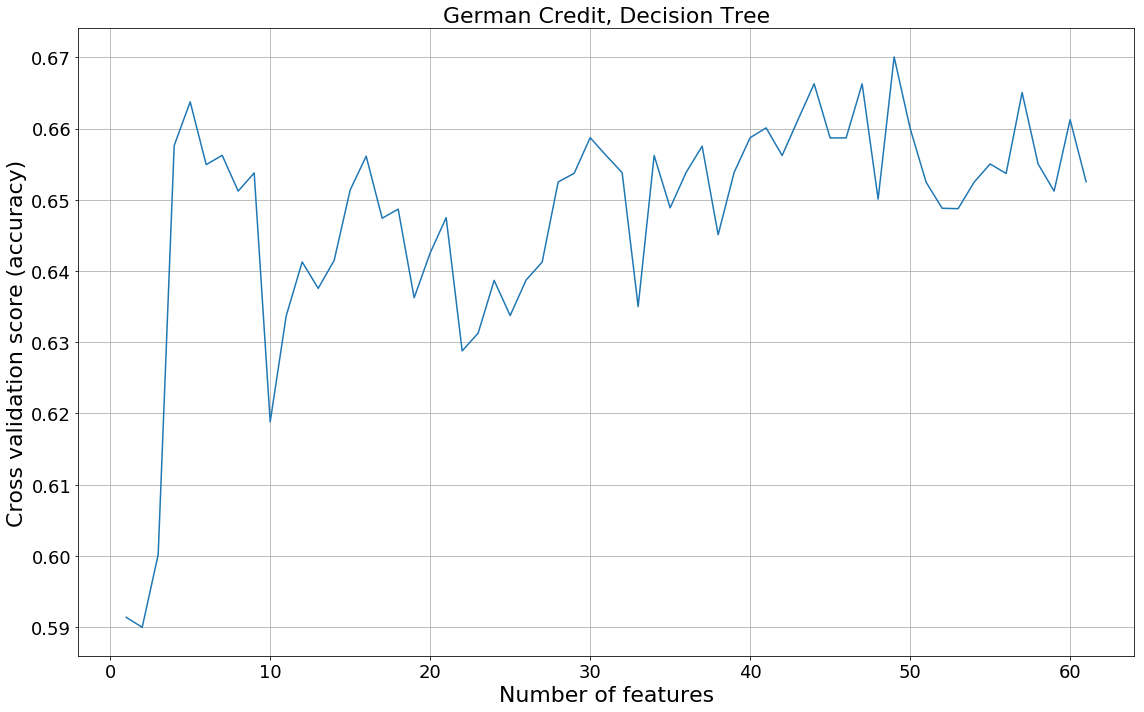

In [29]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('German Credit, Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
plt.savefig('out/german_credit-rfe.png');

# Hyperparameter Tuning

In [30]:
def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    results['mean_fit_time'] = cv_results['mean_fit_time']
    results['mean_score_time'] = cv_results['mean_score_time']
    results['mean_train_score'] = cv_results['mean_train_score']
    results['std_train_score'] = cv_results['std_train_score']
    results['mean_test_score'] = cv_results['mean_test_score']
    results['std_test_score'] = cv_results['std_test_score']
    results['rank_test_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_test_score'], ascending=False)
    return results

In [31]:
from sklearn.model_selection import GridSearchCV

hyperparams = {'criterion':('gini', 'entropy'), 
               'max_depth':[1, 5, 10, 50],
               'max_leaf_nodes': [5, 20, 100]}
clf = DecisionTreeClassifier(min_samples_split=2)
gridsearch = GridSearchCV(clf, hyperparams, cv=5, return_train_score=True)
%time gridsearch.fit(X_train, y_train)

Wall time: 1.24 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 5, 10, 50],
                       

In [32]:
results = cv_results_to_df(gridsearch.cv_results_)
results

,criterion,max_depth,max_leaf_nodes,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,gini,1,5,0.004400,0.001600,0.698750,0.000431,0.69875,0.001717,1
1,gini,1,20,0.005001,0.001600,0.698750,0.000431,0.69875,0.001717,1
14,entropy,1,100,0.004802,0.001406,0.698750,0.000431,0.69875,0.001717,1
13,entropy,1,20,0.004799,0.001201,0.698750,0.000431,0.69875,0.001717,1
12,entropy,1,5,0.004399,0.001200,0.698750,0.000431,0.69875,0.001717,1
2,gini,1,100,0.005400,0.001401,0.698750,0.000431,0.69875,0.001717,1
7,gini,10,20,0.007799,0.001601,0.811881,0.011447,0.69500,0.012180,7
10,gini,50,20,0.007198,0.001801,0.811881,0.011447,0.69500,0.012180,7
16,entropy,5,20,0.006622,0.001310,0.773458,0.022065,0.69000,0.029529,9
22,entropy,50,20,0.008801,0.001800,0.793449,0.013994,0.68750,0.035515,10


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

hyperparam_dist = {"max_depth": sp_randint(1, 50),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "criterion": ["gini", "entropy"]}

clf = DecisionTreeClassifier(min_samples_split=2)
randomsearch = RandomizedSearchCV(clf, param_distributions=hyperparam_dist, 
                                  cv=5, return_train_score=True, n_iter=100, iid='warn');
%time randomsearch.fit(X_train, y_train);

Wall time: 3.85 s


C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [34]:
cv_results_to_df(randomsearch.cv_results_)

,criterion,max_depth,max_features,min_samples_split,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
92,entropy,7,4,2,0.005000,0.001600,0.776252,0.018625,0.72000,0.024151,1
59,entropy,4,3,5,0.003999,0.001401,0.716256,0.011448,0.71000,0.012993,2
76,gini,4,8,8,0.004802,0.001198,0.734679,0.010734,0.70375,0.021870,3
42,gini,1,9,5,0.003600,0.001006,0.701254,0.005401,0.70000,0.001186,4
8,gini,1,4,5,0.003400,0.001000,0.698750,0.000431,0.69875,0.001717,5
...,...,...,...,...,...,...,...,...,...,...,...
82,gini,43,1,7,0.003606,0.001000,0.808742,0.011736,0.63125,0.011942,96
97,entropy,37,1,8,0.004005,0.001194,0.800623,0.005274,0.62625,0.027717,97
38,entropy,36,2,6,0.004200,0.001199,0.841561,0.009583,0.62125,0.022514,98
64,entropy,31,2,2,0.004399,0.000999,1.000000,0.000000,0.62125,0.016869,98
